In [1]:
# ===================================================================================================
# Code for Indigo Airlines - Script Text Mining of Review Data for flights
# Author - Rohini Bose
# Date - 9th January, 2020
# Workplace - EBIW Info Analytics, Kolkata
# OS Details - Windows 10 64 bit
# RAM - 8 GB(7.7 GB usable)
# ===================================================================================================

In [2]:
# ===================================================================================================
# Importing the necessary modules and the packages for Text Mining
# Python modules for data read and manipulation
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# Python modules for Text Mining
import nltk 
import string 
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Python modules for visualizations
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import cufflinks as cf

# Downloading the necessary packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# ===================================================================================================

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ebiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ebiw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ebiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# ===================================================================================================
df = pd.read_excel('C:\\Users\\ebiw\\Downloads\\IndigoAirlinesReviewDataLatest1.xls')
print(df.columns)
df
df.dtypes
# ===================================================================================================

Index(['Ratings', 'shortComments', 'longComments'], dtype='object')


Ratings          object
shortComments    object
longComments     object
dtype: object

In [4]:
# ===================================================================================================
# Converting the datatypes of the review
df["longComments"] = df["longComments"].astype(str)
df["shortComments"] = df["shortComments"].astype(str)
# ===================================================================================================

In [5]:
# ===================================================================================================
# Preprocessing the data before the Text Analysis
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df["longComments"] = preprocess(df["longComments"])

def pre_process1(text):
    
    # lowercase
    text=text.lower()
    
    # remove numbers
    text = re.sub(r'\d+', '', text) 
    
    # remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove whitespace
    text = " ".join(text.split())
    
    # remove special characters
    text = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in text.split("\n")]
    
    return text

df['longComments'] = df['longComments'].apply(lambda x: pre_process1(x))
df['longComments'] = df['longComments'].astype(str)
df['longComments']

#Spelling Correction
df['longComments'] = df['longComments'].apply(lambda x: str(TextBlob(x).correct()))
# ===================================================================================================

In [6]:
# ===================================================================================================
# Removing Stopwords
stop_words = set(stopwords.words('english'))       
df["longComments"] = df["longComments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['longComments']

# Lemmatizing the review
df['longComments'] = df['longComments'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Common word removal
freq = pd.Series(' '.join(df['longComments']).split()).value_counts()[:10]
freq
freq = list(freq.index)
df['longComments'] = df['longComments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Additional word removal
manual_removal = ['delhi','coimbatore','singapore','nep','kolkata','via','hyderabad','revie','flew','nephew','much','kiss',
                  'professi','Name','airp','bangalore', 'bengaluru', 'nagpur', 'indigo','singaporean', 'flown','lumbar',
                  'minute','year','mon','various','usually','done','pure','even','though','pm','ulcer','despite','longComments']
new_stopwords = stop_words.union(manual_removal)
pat = r'\b(?:{})\b'.format('|'.join(new_stopwords))
df["longComments"] = df["longComments"].str.replace(pat, '')
df["longComments"] = df["longComments"].str.replace(r'\s+', ' ')
df['longComments']
# ===================================================================================================

0      [' today amazing experience traveled unaccompa...
1      [' one write review today experience mandate r...
2      [' checking smoothly well baggage security scr...
3      [' early morning arrived airport ahead schedul...
4      [' claim departure arrival joke fifth month ye...
                             ...                        
356    [' plane new check smooth systematic use halfw...
357    [' go three plane new clean professional large...
358    [' lack organisational communication skill tic...
359    [' first tried travel broker spicejet jet alwa...
360    [' domestic last never ten delay fairly compre...
Name: longComments, Length: 361, dtype: object

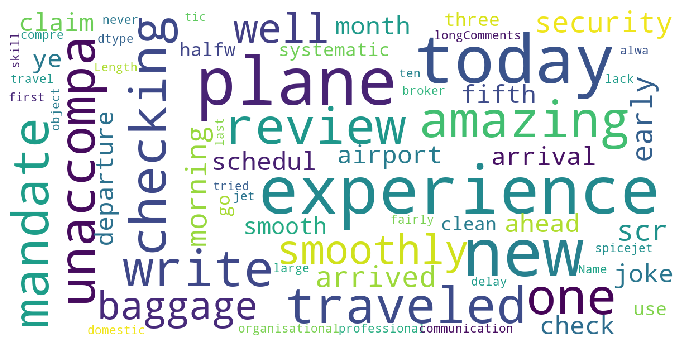

In [9]:
# ===================================================================================================
# Creating Wordclouds as visualizations
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['longComments'])
# ===================================================================================================

In [11]:
# ===================================================================================================
# Checking the Sentiment Polarity for each review
df['polarity_long'] = df['longComments'].map(lambda text: TextBlob(text).sentiment.polarity)

# Long Comments - Polarity assignment
neg_polarity_long = df.loc[df.polarity_long < 0]
pos_polarity_long = df.loc[df.polarity_long > 0]
neutral_polarity_long = df.loc[df.polarity_long == 0]
neg_polarity_long[:10]
# ===================================================================================================

,Ratings,shortComments,longComments,polarity_long
1,1,"""allocated seats in four different rows""",[' one write review today experience mandate r...,-0.040000
6,1,"""do not be fooled""",[' verified amritsar worst travelled luggage w...,-0.104687
11,2,"""check-in was fairly nonchalant""",['dora kathmandu dora assisted well arrived te...,-0.008333
13,1,"""advise avoiding Indigo""",[' verified schedule departure till delayed ho...,-0.208333
16,5,"""missed the flight by 5-10 min""",[' ahmedabad generally good term punctually ho...,-0.012500
35,1,"""restriction on carry-on weight""",[' chennai hard restriction carron weight g pe...,-0.176389
36,1,"""a disastrous experience""",[' verified mangalore extremely poor three tic...,-0.200000
39,3,"""delayed by almost 2 hours""",[' got delayed almost hour shop almost closed ...,-0.287500
43,2,"""already running late for flight""",['ahmadabad total chaos paid extra luggage rec...,-0.021429
47,1,"""didn't have a printout of boarding pass""",[' jaipur web check pas phone get print upon r...,-0.300000


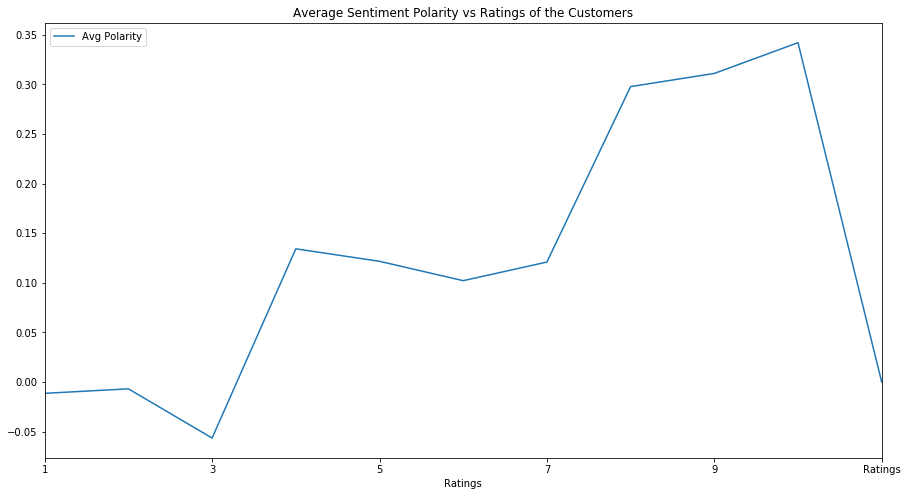

In [12]:
# ===================================================================================================
# Creating Polarity charts
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Histograms for the Sentiment Polarity score
df['polarity_long'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution for Long Comments')

# Review rating Distribution
df['Ratings'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

# Average Polarity score by Review Rating
rating_polarity=df.groupby(['Ratings'])['polarity_long'].mean()
rating_polarity=rating_polarity.to_frame()
rating_polarity=rating_polarity.rename(columns={"polarity_long": "Avg Polarity"})
rating_polarity.plot(y='Avg Polarity', 
                     use_index=True ,
                     figsize=(15,8) ,
                     title="Average Sentiment Polarity vs Ratings of the Customers")
# ===================================================================================================

                          frequency
jaipur group student             22
run route                        16
find wallet yesterday            16
enough adjust                    14
return however return            14
friend also traveling            12
front made                       12
retrieved safe                   12
good attendant responded         10
delay connecting                 10


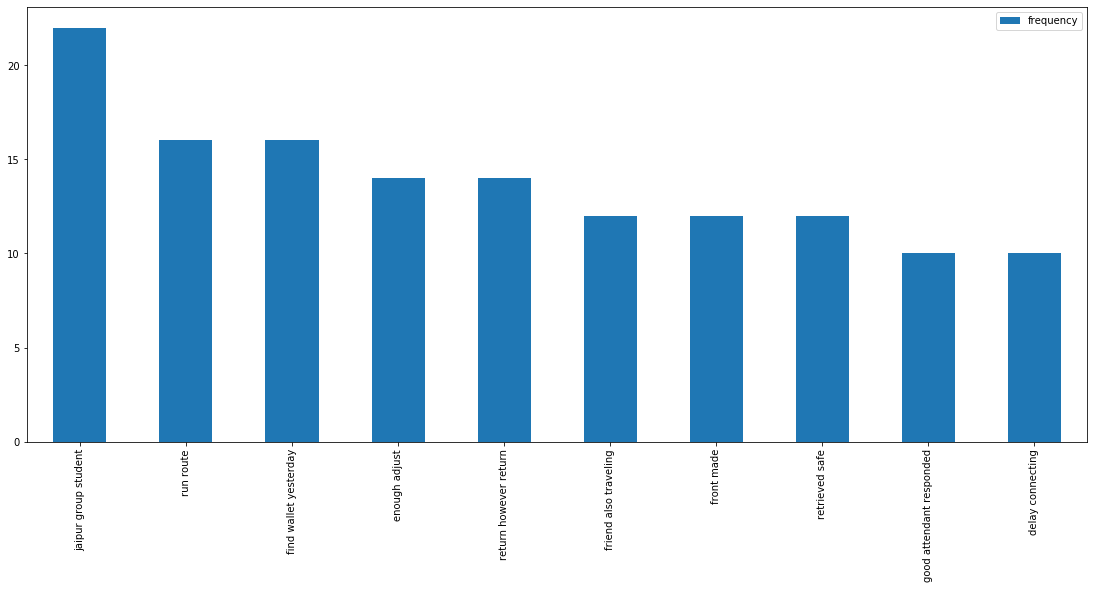

In [16]:
# ===================================================================================================
# Creating top n-grams frequency for the Text Analysis
word_vectorizer = CountVectorizer(ngram_range=(2,3), analyzer='word')
sparse_matrix_long = word_vectorizer.fit_transform(df['longComments'])
frequencies_long = sum(sparse_matrix_long).data
f = pd.DataFrame(frequencies_long, index=word_vectorizer.get_feature_names(), columns=['frequency'])
f = f.sort_values(by='frequency', ascending=False)

# Top 10 n-grams
top_10_long = f[:10]
print(top_10_long)

# Creating a barplot for the Top 10 n-grams
top_10_long.plot(y='frequency',kind="bar",use_index=True,figsize=(19,8))
# ===================================================================================================

In [14]:
# ===================================================================================================
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(df['longComments'])  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(df['longComments']) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(15))

# Getting the Top 15 bigrams
top_bi = words[:15]

# Plotting the top 15 bigrams
fig = px.bar(top_bi, x="term", y="rank",title="Top 15 bigram most words used in the text")
fig.show()
# ===================================================================================================



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                     term      rank
1829        delayed hour  2.773191
108          air hostess  2.168621
1004        cabin polite  2.135356
4564  overall experience  2.095364
6893    worst experience  1.864849
3804            low cost  1.701490
6580         value money  1.602945
4452            one hour  1.504847
5125   quite comfortable  1.479539
2974        hand luggage  1.472938
5543  schedule departure  1.374467
2924    great experience  1.322208
3559      landing smooth  1.304851
782            best part  1.292625
2278     experience good  1.239751


In [15]:
# ===================================================================================================
# Getting trigrams  
vectorizer = CountVectorizer(ngram_range =(3, 3)) 
X1 = vectorizer.fit_transform(df['longComments'])  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3, 3)) 
X2 = vectorizer.fit_transform(df['longComments']) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(15)) 

# Getting the Top 15 trigrams
top_tri = words[:15]

# Plotting the top 15 trigrams
fig = px.bar(top_tri, x="term", y="rank",title="Top 15 trigram most words used in the text")
fig.show()
# ===================================================================================================



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                            term      rank
1740          create issue food  1.097545
3733         landing smooth one  1.088178
2716      food tasted fantastic  1.056644
105      ahmedabad delayed hour  0.962041
496          arrival card board  0.908803
4449       never bad experience  0.866649
2234  enjoyable pleasure flying  0.847991
7222      would keep travelling  0.847296
5350    quite comfortable cabin  0.811065
1502   comfortable cabin polite  0.811065
5222       problem arrival card  0.794930
5112    polite welcoming nature  0.787749
1058     cabin polite welcoming  0.787749
3673    kept wellinformed delay  0.785151
5027    pilot kept wellinformed  0.785151


In [19]:
# ===================================================================================================
# Identifying some examples of positive and negative reviews using Sentiment Polarity score for each
# category of ratings

# Low Polarity Score
low_polarity = df.loc[df.groupby("Ratings")["polarity_long"].idxmin()]
print(low_polarity.iloc[0,2])
print(low_polarity.iloc[1,2])

low_polarity = low_polarity.drop(low_polarity.index[10])
low_polarity

# Exporting to a csv
low_polarity.to_csv(r'C:\Users\ebiw\Documents\Low_Polarity.csv')

# High Polarity Score
high_polarity = df.loc[df.groupby("Ratings")["polarity_long"].idxmax()]
print(high_polarity.iloc[9,2])
print(high_polarity.iloc[8,2])

high_polarity = high_polarity.drop(high_polarity.index[10])

# Exporting to a csv
high_polarity.to_csv(r'C:\Users\ebiw\Documents\High_Polarity.csv')
# ===================================================================================================

['ahmedabad management skill changed gate number end moment announcement made asked stay line almost hour travel worst experience ever']
[' disappointed delay delayed going sarah trivandrum one hour delay return sarah booked false image worst experience inform delay sum mean waste attitude worst learn respect passengers']
[' verified go would like thank nail rose helped find wallet yesterday lost go informed sister co operated got wallet successfully everything intact']
[' always amazed environment aircraft chennai well maintained take care passenger well definitely best india would always happy fly airline']
